## **Lab 6 - Gaussian Process**

In general, Gaussian Process (GP) is a stochastic process used for modeling data, which were observed over time, space or both. Main thing that can characterise GP is that is a kind of generalization of normal probability distributions, where each of them describes a random variable (scalar or vector if we deal with multivariate distribution).

In [1]:
import numpy as np
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt

#### **Task 1: simulating from Gaussian Process model**

To make any simulations, first you need a set of observations:

In [7]:
#Observed data
x_obs = [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]
y_obs = [0.328572824089476, 4.20607004111644, 1.35507551134795,
0.161608755204364, -5.42320349780782, -3.05851276224202, -0.0764172642034502,
-4.55218472276499, -0.902226297922731, -5.8609833528976, -1.05854090910473]

Model also needs sampling space and the indexes of where our observed data resides there:

In [2]:
x_predict = np.linspace(-11,11,551,endpoint=True)
observed_idx = [26, 76, 126, 176, 226, 276, 326, 376, 426, 476, 526]

In this example we are using kernel from exponentiated quadratic family, so we need to provide its hyperparameters (alpha and rho). Moreover, for sample generation, we would like to set a sigma value. Let's start with some arbitrarily selected parameters:

In [3]:
alpha = 3
rho = 5.5
sigma = 2

Now we can create a model and sample from it.

In [5]:
model = CmdStanModel(stan_file='gaussian_process.stan')

INFO:cmdstanpy:compiling stan file C:\Users\igach\Desktop\Python_folder\Topic_6\gaussian_process.stan to exe file C:\Users\igach\Desktop\Python_folder\Topic_6\gaussian_process.exe
INFO:cmdstanpy:compiled model executable: C:\Users\igach\Desktop\Python_folder\Topic_6\gaussian_process.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/igach/Desktop/Python_folder/Topic_6/gaussian_process.hpp C:/Users/igach/Desktop/Python_folder/Topic_6/gaussian_process.stan
Warning in 'C:/Users/igach/Desktop/Python_folder/Topic_6/gaussian_process.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/igach/Desktop/Python_folder/Topic_6/gaussian_process.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is d

In [8]:
data = dict(N_predict = len(x_predict),
            x_predict = x_predict,
            N_obs = len(y_obs),
            observed_idx = observed_idx,
            y_obs = y_obs,
            alpha = 3,
            rho = 5.5,
            sigma = 2)

In [9]:
result = model.sample(data=data, chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:05 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:10 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |█▊        | 00:15 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:19 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:23 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:26 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:29 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:32 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:35 Iteration:  800 / 2000 [ 40%]  (Warmup)





chain 1 |█████     | 00:39 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:42 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:46 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:49 Iteration: 1200 / 2000 [ 6


INFO:cmdstanpy:CmdStan done processing.


Plotting a few samples generated from the model:

In [10]:
y_predict = result.stan_variable('y_predict')

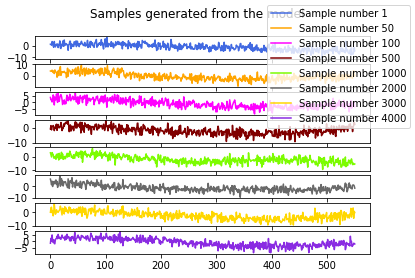

In [11]:
fig, axs = plt.subplots(8)
fig.suptitle('Samples generated from the model')
axs[0].plot(y_predict[0], color = 'royalblue')
axs[1].plot(y_predict[49], color = 'orange')
axs[2].plot(y_predict[99], color = 'magenta')
axs[3].plot(y_predict[499], color = 'maroon')
axs[4].plot(y_predict[999], color = 'lawngreen')
axs[5].plot(y_predict[1999], color = 'dimgray')
axs[6].plot(y_predict[2999], color = 'gold')
axs[7].plot(y_predict[3999], color = 'blueviolet')
fig.legend(['Sample number 1', 'Sample number 50','Sample number 100', 'Sample number 500', 'Sample number 1000', 'Sample number 2000', 'Sample number 3000', 'Sample number 4000'], loc = 'upper right')

Plotting the mean value from model with its confidence interval (standar deviation, using errorbar function):

In [12]:
mean_val= []
std_val = []

for y in y_predict:
    mean_val.append(np.mean(y))
    std_val.append(np.std(y))

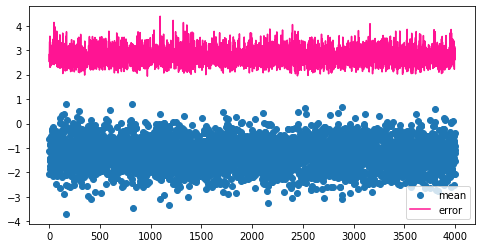

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4),sharex = True)

axes.scatter([*range(4000)], mean_val)
axes.errorbar([*range(4000)], std_val, color = 'deeppink')

axes.legend(['mean','error'])
plt.show()

#### **Task 2: Optimizing the hyperparameters**

To achive better results of GP fitting for our observed data, we need to oprimize its parameters. We can do that by using maximum marginal likelihood estimation. It can be done by placing parameters in "parameter" block in stan model and using "optimize" method.

In [15]:
model2 = CmdStanModel(stan_file = 'gaussian_process_optimize.stan')

INFO:cmdstanpy:compiling stan file C:\Users\igach\Desktop\Python_folder\Topic_6\gaussian_process_optimize.stan to exe file C:\Users\igach\Desktop\Python_folder\Topic_6\gaussian_process_optimize.exe
INFO:cmdstanpy:compiled model executable: C:\Users\igach\Desktop\Python_folder\Topic_6\gaussian_process_optimize.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/igach/Desktop/Python_folder/Topic_6/gaussian_process_optimize.hpp C:/Users/igach/Desktop/Python_folder/Topic_6/gaussian_process_optimize.stan
Warning in 'C:/Users/igach/Desktop/Python_folder/Topic_6/gaussian_process_optimize.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/igach/Desktop/Python_folder/Topic_6/gaussian_process_optimize.stan', line 14, column 31: cov_exp

In [17]:
data = dict(x_obs = x_obs,
            N_obs = len(y_obs),
            y_obs = y_obs)

In [18]:
result2 = model2.optimize(data=data, seed=5838298)

INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


Optimizing parameters with mentioned method and generating new samples with model from task 1:

In [19]:
opt_alpha = result2.stan_variable('alpha')
opt_rho = result2.stan_variable('rho')
opt_sigma = result2.stan_variable('sigma')

print('alpha',opt_alpha)
print('rho',opt_rho)
print('sigma',opt_sigma)

alpha 3.1811
rho 1.13658
sigma 0.196539


In [20]:
data = dict(N_predict = len(x_predict),
            x_predict = x_predict,
            N_obs = len(y_obs),
            observed_idx = observed_idx,
            y_obs = y_obs,
            alpha = opt_alpha,
            rho = opt_rho,
            sigma = opt_sigma)

In [21]:
result3 = model.sample(data=data, chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status





chain 1 |▉         | 00:23 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:49 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 01:12 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 01:32 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 01:54 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 02:15 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 02:33 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 02:51 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 03:09 Iteration:  800 / 2000 [ 40%]  (Warmup)





chain 1 |█████▍    | 03:30 Iteration: 1000 / 2000 [ 50%]  (Warmup)


chain 1 |█████▉    | 03:54 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 04:19 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 04:44 Iteration: 1200 / 2000 


INFO:cmdstanpy:CmdStan done processing.


In [22]:
y_predict2 = result3.stan_variable('y_predict')

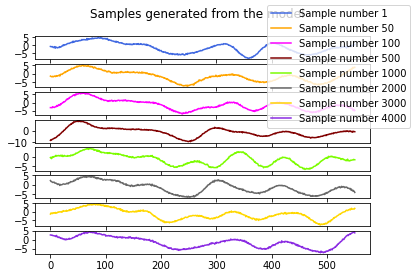

In [23]:
fig, axs = plt.subplots(8)
fig.suptitle('Samples generated from the model')
axs[0].plot(y_predict2[0], color = 'royalblue')
axs[1].plot(y_predict2[49], color = 'orange')
axs[2].plot(y_predict2[99], color = 'magenta')
axs[3].plot(y_predict2[499], color = 'maroon')
axs[4].plot(y_predict2[999], color = 'lawngreen')
axs[5].plot(y_predict2[1999], color = 'dimgray')
axs[6].plot(y_predict2[2999], color = 'gold')
axs[7].plot(y_predict2[3999], color = 'blueviolet')
fig.legend(['Sample number 1', 'Sample number 50','Sample number 100', 'Sample number 500', 'Sample number 1000', 'Sample number 2000', 'Sample number 3000', 'Sample number 4000'], loc = 'upper right')

In [24]:
mean_val= []
std_val = []

for y in y_predict2:
    mean_val.append(np.mean(y))
    std_val.append(np.std(y))

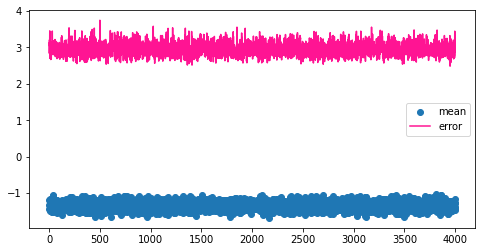

In [25]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4),sharex = True)

axes.scatter([*range(4000)], mean_val)
axes.errorbar([*range(4000)], std_val, color = 'deeppink')

axes.legend(['mean','error'])
plt.show()